In [18]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
from google.colab import files
uploaded = files.upload()

# Load the file (replace the name if needed)
df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')

# Preview the data
df.head()


Saving IMDb Movies India.csv to IMDb Movies India (2).csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [20]:
df.info()
df.columns
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Mamta,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [21]:
# Drop rows with missing ratings (target column)
df = df.dropna(subset=['Rating'])

# Clean 'Year' column
df['Year'] = df['Year'].str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop non-essential columns or fill missing
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# Drop rows with missing essential data
df = df.dropna(subset=['Genre', 'Director', 'Actor 1'])

# Fill remaining missing values with 'Unknown'
df.fillna('Unknown', inplace=True)


<ipython-input-21-6c7af520055b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].str.extract(r'(\d{4})')
<ipython-input-21-6c7af520055b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
<ipython-input-21-6c7af520055b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [25]:
# Select features and target
features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']]
target = df['Rating']

# Encode categorical features
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])

# Final check
features.head()


# Replace NaN with a string value before encoding (ensure all are strings)
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Convert to string and fill missing with 'Unknown'
for col in categorical_cols:
    features[col] = features[col].astype(str).fillna('Unknown')

    # Now apply Label Encoding
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])



<ipython-input-25-590e28561bac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
<ipython-input-25-590e28561bac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
<ipython-input-25-590e28561bac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [29]:
# Select features and target
features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']]
target = df['Rating']

# Replace NaNs with "Unknown" in categorical columns
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    features[col] = features[col].fillna('Unknown').astype(str)

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Ensure numeric columns are clean
features['Year'] = pd.to_numeric(features['Year'], errors='coerce')
features['Duration'] = pd.to_numeric(features['Duration'], errors='coerce')
features['Votes'] = pd.to_numeric(features['Votes'], errors='coerce')

# Drop rows with NaNs (after conversion)
features = features.dropna()
target = target[features.index]  # align target


<ipython-input-29-6143f2503157>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = features[col].fillna('Unknown').astype(str)
<ipython-input-29-6143f2503157>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = features[col].fillna('Unknown').astype(str)
<ipython-input-29-6143f2503157>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

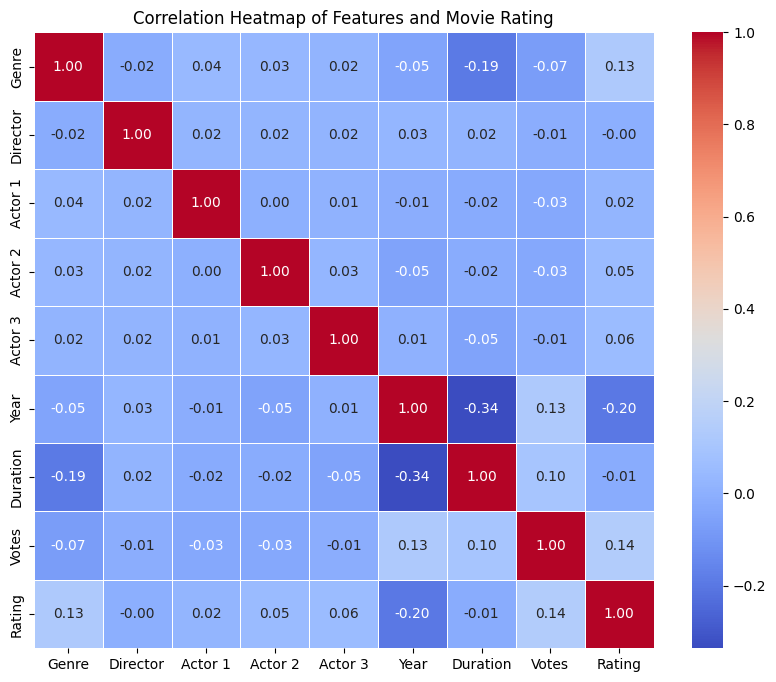

In [32]:
# Combine features and target into a single DataFrame for correlation analysis
heatmap_data = features.copy()
heatmap_data['Rating'] = target

# Compute correlation matrix
corr_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features and Movie Rating")
plt.show()


In [30]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.8309818782071015
R^2 Score: -0.022901640479228824


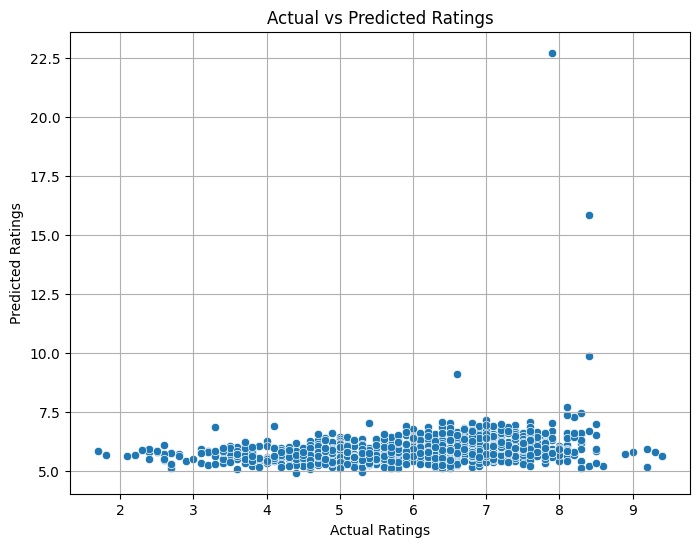

In [31]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid()
plt.show()


In [34]:
# Create a single sample input as a DataFrame
new_movie = pd.DataFrame({
    'Genre': ['Drama'],
    'Director': ['Rajkumar Hirani'],
    'Actor 1': ['Aamir Khan'],
    'Actor 2': ['Kareena Kapoor'],
    'Actor 3': ['R. Madhavan'],
    'Year': [2009],
    'Duration': [170],
    'Votes': [950000]
})

# Encode categorical columns using previously saved label_encoders
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = label_encoders[col]
    if new_movie[col][0] in le.classes_:
        new_movie[col] = le.transform(new_movie[col])
    else:
        # Handle unseen labels by assigning an 'unknown' code
        new_movie[col] = le.transform(['Unknown'])

# Predict rating
predicted_rating = model.predict(new_movie)[0]
print(f"Predicted Rating: {predicted_rating:.2f}")


Predicted Rating: 33.51
